# Modeling data 2

## Building a model

Recall that in notebook 3, we saw that we could use a mathematical function to classify an image as an apple or a banana, based on the average amount of green in an image:

<img src="data/data_flow.png" alt="Drawing" style="width: 500px;"/>


<img src="data/what_is_model.png" alt="Drawing" style="width: 300px;"/>

A common function for performing this kind of **classification** is the sigmoid that we saw in the last notebook, and that we will now extend by adding two **parameters**, $w$ and $b$:

$$\sigma(x; w, b) := \frac{1}{1 + \exp(-wx + b)}$$

$$ x = \mathrm{data} $$

\begin{align}
\sigma(x;w,b) &\approx 0 \implies \mathrm{apple} \\
\sigma(x;w,b) &\approx 1 \implies \mathrm{banana}
\end{align}

In our mathematical notation above, the `;` in the function differentiates between the **data** and the **parameters**. `x` is the data and is determined from the image. The parameters, `w` and `b`, are numbers which we choose to make our function match the results it should be modeling.

Note that in the code below, we don't distinguish between data and parameters - both are just inputs to our function, σ!

In [13]:
using Images

apple = load("data/10_100.jpg")
banana = load("data/104_100.jpg")

apple_green_amount = mean(Float64.(green.(apple)))
banana_green_amount = mean(Float64.(green.(banana)))

"Average green for apple = $apple_green_amount; " *
"Average green for banana = $banana_green_amount; "

"Average green for apple = 0.33851803921568646; Average green for banana = 0.8808207843137256; "

In [14]:
σ(x, w, b) = 1 / (1 + exp(-w * x + b))

σ (generic function with 1 method)

What we want is that when we give σ as input the average green for the apple, roughly `x = 0.3385`, it should return as output something close to 0, meaning "apple". And when we give σ the input `x = 0.8808`, it should output something close to 1, meaning "banana".

By changing the parameters of the function, we can change the shape of the function, and hence make it represent, or **fit**, the data better!

## Data fitting by varying parameters

We can understand how our choice of `w` and `b` affects our model by seeing how our values for `w` and `b` change the plot of the $\sigma$ function.

To do so, we will use the `Interact.jl` Julia package, which provides "widgets" for controlling parameters interactively via sliders:

In [15]:
using Plots; gr()   # GR works better for interactive manipulations
using Interact      # package for interactive manipulation

Run the code in the next cell. You should see two "sliders" appear, one for `w` and one for `b`.

**Game**: 
Move both of those sliders around until the blue curve, labeled "model", which is the graph of the `\sigma` function, passes through *both* of the data points at the same time.

In [16]:
@manipulate for w in -10:0.01:30, b in 0:0.1:20
    
    plot(x -> σ(x, w, b), xlim=(-0,1), ylim=(-0.1,1.1), label="model", legend=:topleft, lw=3)
    
    scatter!([apple_green_amount],  [0.0], label="apple", ms=5)   # marker size = 5
    scatter!([banana_green_amount], [1.0], label="banana", ms=5)
    
end

Interact.Options{:SelectionSlider,Any}(15: "input-6" = 10.0 Any , "w", 10.0, "10.0", 2001, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("-10.0"=>-10.0,"-9.99"=>-9.99,"-9.98"=>-9.98,"-9.97"=>-9.97,"-9.96"=>-9.96,"-9.95"=>-9.95,"-9.94"=>-9.94,"-9.93"=>-9.93,"-9.92"=>-9.92,"-9.91"=>-9.91…), Dict{Any,Any}(Pair{Any,Any}(24.1, "24.1"),Pair{Any,Any}(-6.32, "-6.32"),Pair{Any,Any}(9.84, "9.84"),Pair{Any,Any}(-2.43, "-2.43"),Pair{Any,Any}(27.55, "27.55"),Pair{Any,Any}(23.28, "23.28"),Pair{Any,Any}(-3.89, "-3.89"),Pair{Any,Any}(-4.49, "-4.49"),Pair{Any,Any}(16.81, "16.81"),Pair{Any,Any}(15.21, "15.21")…)), Any[], Any[], true, "horizontal")

Interact.Options{:SelectionSlider,Any}(17: "input-7" = 10.0 Any , "b", 10.0, "10.0", 101, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("0.0"=>0.0,"0.1"=>0.1,"0.2"=>0.2,"0.3"=>0.3,"0.4"=>0.4,"0.5"=>0.5,"0.6"=>0.6,"0.7"=>0.7,"0.8"=>0.8,"0.9"=>0.9…), Dict{Any,Any}(Pair{Any,Any}(1.2, "1.2"),Pair{Any,Any}(15.6, "15.6"),Pair{Any,Any}(10.7, "10.7"),Pair{Any,Any}(13.2, "13.2"),Pair{Any,Any}(11.0, "11.0"),Pair{Any,Any}(7.4, "7.4"),Pair{Any,Any}(0.2, "0.2"),Pair{Any,Any}(12.4, "12.4"),Pair{Any,Any}(16.7, "16.7"),Pair{Any,Any}(11.6, "11.6")…)), Any[], Any[], true, "horizontal")

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0.0 
 
 
 0.2 
 
 
 0.4 
 
 
 0.6 
 
 
 0.8 
 
 
 1.0 
 
 
 0.00 
 
 
 0.25 
 
 
 0.50 
 
 
 0.75 
 
 
 1.00 
 
<polyline clip-path="url(#clip2702)" style="stroke:#009af9; stroke-width:3; stroke-opacity:1; fill:none" points="
 -2613.74,345.531 -2125.08,345.531 -1831.42,345.531 -1583.14,345.531 -1313.43,345.531 -1064.78,345.531 -798.205,345.531 -489.351,345.531 -214.877,345.53 25.8113,345.52 
 157.019,345.409 288.226,344.163 321.223,343.024 354.22,340.95 387.217,337.209 420.214,330.563 436.712,325.579 453.211,319.087 469.709,310.742 486.207,300.194 
 502.706,287.144 519.204,271.416 535.703,253.051 552.201,232.38 570.442,207.639 588.683,182.135 606.924,157.279 625.165,134.346 643.407,114.233 661.648,97.3598 
 679.889,83.7265 698.13,73.0406 716.371,64.8629 734.612,58.7183 752.853,54.1649 771.094,50.8249 807.577,46.6331 844.059,44.4508 913.483,42.7908 982.906,42.3273 
 1052.33,42.1986 1121.75,42.1629 1410.49,42.1492 1653.55,42.1492 1950.29,42.1492 2229.24,42.1492 2676.14,42.1492 
 "/>
 
 
 
 
 
 
 
 
 model 
 
 
 
 
 apple 
 
 
 
 
 banana

Notice that the two parameters do two very different things. The **weight**, `w`, determines *how fast* the transition between 0 and 1 occurs. It encodes how trustworthy we think our data  actually is, and in what range we should be putting points between 0 and 1 and thus calling them "unsure". The **bias**, `b`, encodes *where* on the $x$-axis the switch should take place. It can be seen as shifting the function left-right. We'll come to understand these *parameters* more in notebook 6.

Here are some parameter choices that work well:

In [10]:
w = 25.58; b = 15.6

plot(x -> σ(x, w, b), xlim=(0,1), ylim=(-0.1,1.1), label="model", legend=:topleft, lw=3)

scatter!([apple_green_amount], [0.0], label="apple")
scatter!([banana_green_amount],[1.0], label="banana")

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0.0 
 
 
 0.2 
 
 
 0.4 
 
 
 0.6 
 
 
 0.8 
 
 
 1.0 
 
 
 0.00 
 
 
 0.25 
 
 
 0.50 
 
 
 0.75 
 
 
 1.00 
 
<polyline clip-path="url(#clip2302)" style="stroke:#009af9; stroke-width:3; stroke-opacity:1; fill:none" points="
 -2613.74,345.531 -2125.08,345.531 -1831.42,345.531 -1583.14,345.531 -1313.43,345.531 -1064.78,345.531 -798.205,345.531 -489.351,345.531 -214.877,345.531 25.8113,345.531 
 91.4151,345.53 157.019,345.517 189.821,345.467 222.623,345.234 239.024,344.886 255.424,344.136 271.825,342.518 288.226,339.065 296.476,336.078 304.725,331.774 
 312.974,325.644 321.223,317.05 325.348,311.605 329.472,305.27 333.597,297.962 337.722,289.61 341.846,280.165 345.971,269.615 350.095,257.988 354.22,245.365 
 362.469,217.721 370.718,188.349 378.968,159.383 387.217,132.845 391.341,120.952 395.466,110.12 399.591,100.391 403.715,91.7616 411.964,77.6144 420.214,67.1046 
 428.463,59.5075 436.712,54.1237 444.961,50.3618 453.211,47.759 469.709,44.7471 486.207,43.3458 519.204,42.4015 552.201,42.2022 625.165,42.1508 698.13,42.1492 
 771.094,42.1492 844.059,42.1492 982.906,42.1492 1121.75,42.1492 1410.49,42.1492 1653.55,42.1492 1950.29,42.1492 2229.24,42.1492 2676.14,42.1492 
 "/>
 
 
 
 
 
 
 
 
 model 
 
 
 
 
 apple 
 
 
 
 
 banana

(Note that in this problem there are many combinations of `w` and `b` that fit the data well.)

Once we have a model, we have a computational representation for how to choose between "apple" and "banana". So let's pull in some new images and see what our model says about them!

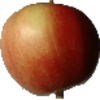

In [17]:
apple2 = load("data/107_100.jpg")

In [18]:
green_amount = mean(Float64.(green.(apple2)))
@show green_amount

scatter!([green_amount], [0.0], label="new apple")

green_amount = 0.46902156862745104


<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0.0 
 
 
 0.2 
 
 
 0.4 
 
 
 0.6 
 
 
 0.8 
 
 
 1.0 
 
 
 0.00 
 
 
 0.25 
 
 
 0.50 
 
 
 0.75 
 
 
 1.00 
 
<polyline clip-path="url(#clip5702)" style="stroke:#009af9; stroke-width:3; stroke-opacity:1; fill:none" points="
 -2613.74,345.531 -2125.08,345.531 -1831.42,345.531 -1583.14,345.531 -1313.43,345.531 -1064.78,345.531 -798.205,345.531 -489.351,345.531 -214.877,345.531 25.8113,345.531 
 91.4151,345.53 157.019,345.515 189.821,345.461 222.623,345.222 239.024,344.883 255.424,344.173 271.825,342.692 288.226,339.625 296.476,337.025 304.725,333.326 
 312.974,328.115 321.223,320.868 329.472,310.968 337.722,297.776 341.846,289.77 345.971,280.762 350.095,270.738 354.22,259.721 362.469,235.01 370.718,207.691 
 378.968,179.436 387.217,152.154 395.466,127.508 403.715,106.544 411.964,89.6086 420.214,76.4871 428.463,66.6461 436.712,59.4442 444.961,54.2675 453.211,50.5946 
 469.709,46.209 486.207,44.0858 519.204,42.5858 552.201,42.2472 625.165,42.1528 698.13,42.1493 771.094,42.1492 844.059,42.1492 982.906,42.1492 1121.75,42.1492 
 1410.49,42.1492 1653.55,42.1492 1950.29,42.1492 2229.24,42.1492 2676.14,42.1492 
 "/>
 
 
 
 
 
 
 
 
 
 
 model 
 
 
 
 
 apple 
 
 
 
 
 banana 
 
 
 
 
 new apple

Our model successfully says that our new image is an apple! Pat yourself on the back: you've actually just trained your first neural network!

#### Exercise 1

Load the image of a banana in `data/8_100.jpg` as `mybanana`. Edit the code below to calculate the amount of green in `mybanana` and to overlay data for this image with the existing model and data points.

#### Solution

# To get the desired overlay, the code we need is

```julia
mybanana = load("data/8_100.jpg")
mybanana_green_amount = mean(Float64.(green.(banana)))
scatter!([mybanana_green_amount], [1.0], label="my banana")
```

## Closing remarks: bigger models, more data, more accuracy

That last apple should start making you think: not all apples are red; some are yellow. "Redness" is one attribute of being an apple, but isn't the whole thing. What we need to do is incorporate more ideas into our model by allowing more inputs. However, more inputs would mean more parameters to play with. Also, we would like to have the computer start "learning" on its own, instead of modifying the parameters ourselves until we think it "looks right". How do we take the next step?

The first thing to think about is, if you wanted to incorporate more data into the model, how would you change the sigmoid function? Play around with some ideas. But also, start thinking about how you chose parameters. What process did you do to finally end up at good parameters? These two problems (working with models with more data and automatically choosing parameters) are the last remaining step to understanding deep learning.